In [22]:
import numpy as np
import pandas as pd
import random
from tqdm import tqdm_notebook as tqdm
from collections import Counter

In [50]:
def construct_bpe(sequences, iterations=10):
    sequences = [[(el, ) for el in s] for s in sequences]
    bpe_order = []
    lens = np.zeros((iterations + 1, len(sequences)), dtype=np.int32)
    for i, s in enumerate(sequences):
        lens[0, i] = len(s)
        
    for ii in tqdm(range(iterations)):
        freqs = Counter()
        words = Counter()
        for seq in sequences:
            for i in range(len(seq) - 1):
                words[seq[i]] += 1
                freqs[seq[i] + seq[i + 1]] += 1
        top = freqs.most_common(1)
        #print("Vocab size is: ", len(words))
        if not top:
            return sequences
        pair, _ = top[0]
        new_sequences = []
        #print(pair)
        bpe_order.append(pair)
        j = 0
        for seq in sequences:
            new_seq = []
            skip = False
            for i in range(len(seq)):
                if skip:
                    skip = False
                    continue
                if i + 1 < len(seq) and seq[i] + seq[i + 1] == pair:
                    new_seq.append(pair)
                    skip = True
                else:
                    new_seq.append(seq[i])
            new_sequences.append(new_seq)
            lens[ii + 1, j] = len(new_seq)
            j += 1
        sequences = new_sequences
    return sequences, bpe_order, lens

In [3]:
import logging
logging.getLogger().setLevel(logging.WARNING)

In [5]:
fnames = ["3randtraj1.npy"]

In [6]:
all_records = np.concatenate([np.load(fname, allow_pickle=True) for fname in fnames])

In [7]:
len(all_records)

1000

In [8]:
from wutils import Record

In [9]:
all_records = [Record(*el) for el in all_records]

In [10]:
data = pd.DataFrame(all_records)

In [37]:
def rand_seq(n, lens):
    return [np.random.randint(n, size=l) for l in lens]

In [51]:
sequences, order, lens = construct_bpe(states, iterations=100)

In [52]:
sequences_rand, _, lens_rand = construct_bpe(rand_seq(64, lens[0,:]), iterations=100)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("dark")
sns.set_context("talk")

In [53]:
means = np.mean(lens, axis=1)
means_rand = np.mean(lens_rand, axis=1)

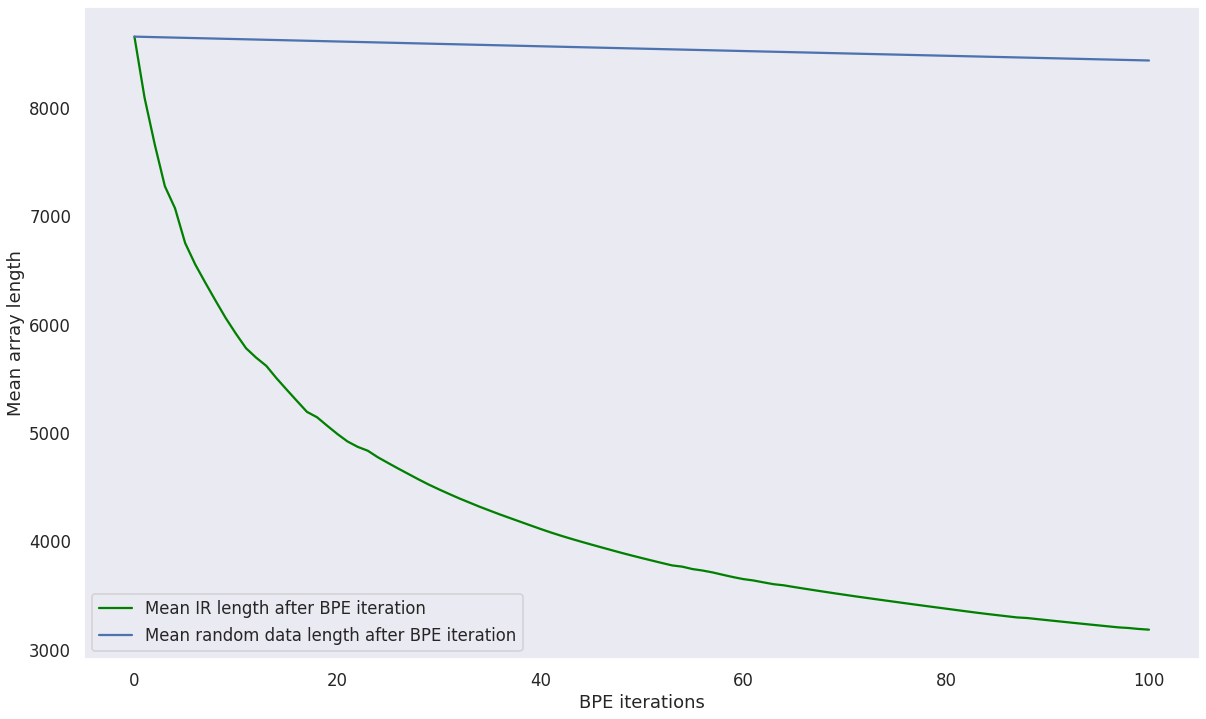

In [54]:
plt.figure(figsize=(20, 12))
plt.plot(range(len(means)), means, color="green", label="Mean IR length after BPE iteration")
plt.plot(range(len(means_rand)), means_rand, label="Mean random data length after BPE iteration")
plt.xlabel("BPE iterations")
plt.ylabel("Mean array length")
plt.legend()
plt.show()